In [1]:
import numpy
from matplotlib.pyplot import plot, show, grid, xlabel, ylabel

import os
import sys


# Important directories
code_dir = os.path.dirname(os.getcwd())
module_dir = os.path.dirname(os.path.dirname(os.getcwd()))

# Allows to import my own module
sys.path.insert(0, code_dir)

from LongstaffSchwarz.stochasticprocesses import BrownianMotion

In [4]:
# The Wiener process parameter.
delta = 0.15
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Number of realizations to generate.
m = 20
# Create an empty array to store the realizations.
x = numpy.empty((m,N+1))
# Initial values of x.
x[:, 0] = 0

brownian = BrownianMotion()
brownian.simulate(x[:,0], N, dt, 0.05, delta, out=x[:,1:])

t = numpy.linspace(0.0, N*dt, N+1)

for k in range(m):
    plot(t, x[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()


TypeError: simulate() got an unexpected keyword argument 'out'

In [5]:
import numpy
from matplotlib.pyplot import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 500
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian.simulate(x[:,0], N, dt, delta, out=x[:,1:])

# Plot the 2D trajectory.
plot(x[0],x[1])

# Mark the start and end points.
plot(x[0,0],x[1,0], 'go')
plot(x[0,-1], x[1,-1], 'ro')

# More plot decorations.
title('2D Brownian Motion')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
axis('equal')
grid(True)
show()


TypeError: simulate() got an unexpected keyword argument 'out'

In [6]:
from LongstaffSchwarz.stochasticprocesses import FractionalBrownianMotion

In [7]:
f = FractionalBrownianMotion(n=1000, hurst=0.7, length=1)

In [8]:
sample = numpy.ones((50,1001))
for i in range(50):
    fbm_sample = f.simulate()
    sample[i,:] = fbm_sample

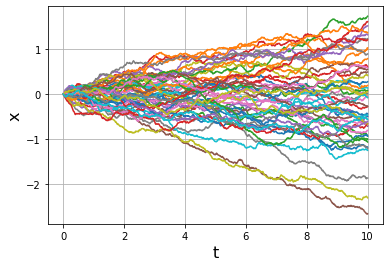

In [9]:
t = numpy.linspace(0.0, 10, 1001)

for k in range(50):
    plot(t, sample[k])
xlabel('t', fontsize=16)
ylabel('x', fontsize=16)
grid(True)
show()

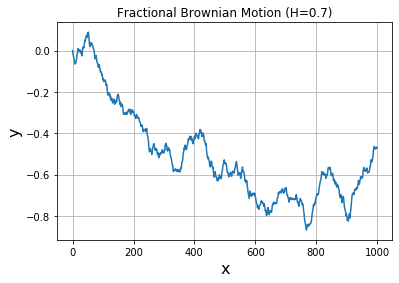

In [10]:
plot(fbm_sample)
title('Fractional Brownian Motion (H=0.7)')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()


In [12]:
from LongstaffSchwarz.LS import LS
import numpy as np

In [13]:
# Model parameters
# Total time.
strike = 0.95
T = 5.0
# Number of steps.
N = 50
dt = T/N
r = 0.01  # riskless rate
sigma = 0.15  # annual volatility of underlying
m = 51  # number of simulated paths

In [14]:
# Simulate the underlying
brownian = BrownianMotion()
rnd = np.random.RandomState(1234)
x = numpy.empty((m,N+1))
x[:, 0] = r
brownian.simulate(x[:,0], N, dt,r, sigma, out=x[:,1:])
t = numpy.linspace(0.0, N*dt, N+1)

x = numpy.empty((51,N+1))
x[:, 0] = 1.0
brownian.simulate(x[:,0], N, dt, sigma, out=x[:,1:])
ls = LS(x,t,r,strike)
ls.simulate()

TypeError: simulate() got an unexpected keyword argument 'out'

In [16]:
# Payoff (exercise) function
strike = 0.95
def put_payoff(spot):
    return np.maximum(strike - spot, 0.0)

In [17]:
# Discount factor function
def constant_rate_df(t_from, t_to):
    return np.exp(-r * (t_to - t_from))

In [18]:
# Selection of paths to consider for exercise (and continuation value approxmation)
def itm(payoff, spot):
    return payoff > 0

In [19]:
ls = LS(x,t,r,strike)

In [21]:
ls.simulate()

1.867232679918448

In [ ]:

l = []
t = numpy.linspace(0.0, 10, 1001)

for i in np.linspace(0.1,0.9,9):
    if i == 0.5:
        continue
    f = FractionalBrownianMotion(n=1000, hurst=i, length=1)
    sample = np.ones((1000,1001))
    print(sample.shape)
    for j in range(1000):
        fbm_sample = f.simulate()
        sample[j,:] = fbm_sample
    ls = LS(sample,t,r,strike)
    l.append(np.abs(1-ls.simulate()))

(1000, 1001)


In [ ]:
plot(np.linspace(0.1,0.9,8),l)
title('Fractional Brownian Motion (H=0.7)')
xlabel('x', fontsize=16)
ylabel('y', fontsize=16)
grid(True)
show()

In [ ]:
f = FractionalBrownianMotion(n=1000, hurst=0.7, length=1)
sample = np.ones((100,1001))
for j in range(100):
    fbm_sample = f.simulate()
    sample[j,:] = fbm_sample
ls = LS(sample,t,r,strike)
ls.simulate()